# 1. **Import modules & Load dataset**


This section involves **importing modules or libraries** used to help the data processing process in the building of a predictive model. The dataset is **loaded from Google Drive**, with the dataset being divided into training data as sample data to train the model, and testing data as sample data to test the built model.

In [1]:
# Import Library.
import pandas as pd
import numpy as np

# Graph modules.
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data encoding module
from sklearn.preprocessing import OneHotEncoder

# Classifier modules.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Load training and testing data from google drive.
df_train = pd.read_csv(r"D:\customer_churn_prediction_system\train.csv")
df_test = pd.read_csv(r"D:\customer_churn_prediction_system\test.csv")

In [3]:
# View training data rows.
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# View testing data rows.
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


# 2. **Data Identification**

Understanding data is crucial for developing prediction models. Identifying data provides insights for comprehensive data handling, ultimately improving data quality. Improved data quality positively impacts model performance.

## ⚡ Find descriptive information

#### ✅ View the variables used in the customer churn dataset

The training dataset contains 19 independent variables and 1 dependent variable as a class data. The testing dataset contains only 20 independent variables without a dependent variable.

In [5]:
# View the variables used in the training data.
df_train.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
# View the variables used in the testing data.
df_test.keys()

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

#### ✅ Distributuin of data class

The training data's dependent attribute value distribution as a class data is displayed.

In [7]:
# Pie chart function
def plot_pie_chart(column, title):
    count = df_train[column].value_counts()
    # Define custom colors for the pie chart
    custom_colors = ['#70a288', '#d5896f', '#33B168']
    # Calculate the percentages
    percentages = count / count.sum() * 100

    # Plotting the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title)
    plt.show()

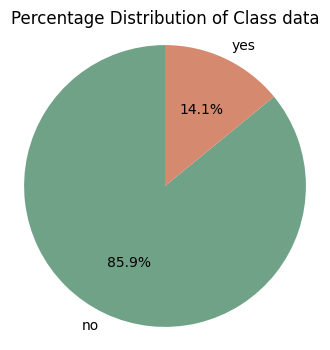

In [8]:
# The function above requires the following input format: (the name of the class column, the title of the pie chart).
plot_pie_chart("churn", "Percentage Distribution of Class data")

#### ✅ Categorical and numerical data type in the dataset

1.   float64 & int64 Dtype = **Numerical data**
2.   object Dtype = **Categorical data**

In [9]:
# View information about the variable column used in the training dataset, such as the variable's data type.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [10]:
# View information about the variable column used in the testing dataset, such as the variable's data type.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

---
⏭ Next step

---

# 3. Data Preprocessing

Datasets can have various issues that negatively affect the performance of the models. These issues include **missing data values**, **outlier data**, and **data encoding problems**. Therefore, the preprocessing stage is crucial in improving data quality by addressing these problems.

In [11]:
# Get the features with categorical data type.
categorical = list(df_train.select_dtypes(['object']).columns)
categorical

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [12]:
# Get the features with numerical data type.
numerical = list(df_train.select_dtypes(['float64','int64']).columns)
numerical

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

### ⚡ Detect missing values

In [13]:
# View how many null values are in each feature of the training data.
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [14]:
# View how many null values are in each feature of the testing data.
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

### ⚡ Detect outlier data using z-score



> 📌 **Z-Score Formula**

$$
Z = \frac{X - \mu}{\sigma}
$$

**Notes:**
1.   Z = Z-score
2.   X = Observed value
3.   μ = Population mean
4.   σ = Standard deviation





In [15]:
# Function of z-score visualisation.
def zscore_visualization(df, column, zscores, outliers):
    # Plot the z-scores with detailed bell-shaped curve.
    plt.figure(figsize=(8, 4))

    # Plot the histogram of z-scores.
    plt.hist(zscores, bins=30, density=True, alpha=0.6, color='#70a288', label='Z-Scores')

    # Plot the bell-shaped curve.
    x = np.linspace(zscores.min(), zscores.max(), 100)
    plt.plot(x, norm.pdf(x), 'r-', label='Bell Curve')

    # Add threshold lines for outliers.
    plt.axvline(-3, color='r', linestyle='--', label='Threshold')
    plt.axvline(3, color='r', linestyle='--')

    # Highlight individual outliers.
    plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Individual Outliers')

    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(f'Z-Score Distribution of {column} with Bell-Shaped Curve')

    # Display the count of outliers.
    plt.text(0.02, 0.9, f'Outliers: {len(outliers)} Data', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# Copy training data into new variable.
df_copy = df_train.copy()

#### ✅ account_length

In [17]:
# FORMULA: Z-score = (observed value - population mean)/standard deviation.
df_copy["zscore"] = (df_copy["account_length"] - df_copy["account_length"].mean())/ df_copy["account_length"].std()
df_copy.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0.170379
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0.926077
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,-0.408990
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,-0.635699
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0.523038


In [18]:
# Retrieve data with a z-score value that is less than -3 or greater than 3.
account_length_outliers = df_copy[(df_copy.zscore<-3) | (df_copy.zscore>3)]
account_length_outliers

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
343,DE,224,area_code_510,yes,no,0,171.5,99,29.16,160.0,...,13.60,212.4,102,9.56,5.0,2,1.35,1,yes,3.117601
684,UT,243,area_code_510,no,no,0,95.5,92,16.24,163.7,...,13.91,264.2,118,11.89,6.6,6,1.78,2,no,3.596209
1193,NM,232,area_code_408,no,no,0,165.6,104,28.15,195.9,...,16.65,118.3,77,5.32,11.8,3,3.19,1,no,3.319120
1304,MI,225,area_code_415,no,no,0,165.4,106,28.12,273.7,...,23.26,210.0,93,9.45,8.7,3,2.35,0,yes,3.142791
1472,WY,225,area_code_415,no,no,0,182.7,142,31.06,246.5,...,20.95,218.0,103,9.81,8.8,2,2.38,1,no,3.142791
1593,ID,224,area_code_510,no,no,0,111.4,133,18.94,175.0,...,14.88,217.2,106,9.77,5.5,6,1.49,3,no,3.117601
2725,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,...,19.05,205.7,103,9.26,2.4,3,0.65,0,no,3.042031
3711,TN,222,area_code_408,no,yes,34,218.5,89,37.15,160.7,...,13.66,181.6,76,8.17,4.9,5,1.32,4,no,3.067221
3719,HI,232,area_code_415,no,no,0,248.2,128,42.19,211.2,...,17.95,147.1,117,6.62,10.0,6,2.70,2,no,3.319120
4079,TN,222,area_code_415,no,no,0,256.6,119,43.62,230.8,...,19.62,236.0,97,10.62,12.2,5,3.29,1,yes,3.067221


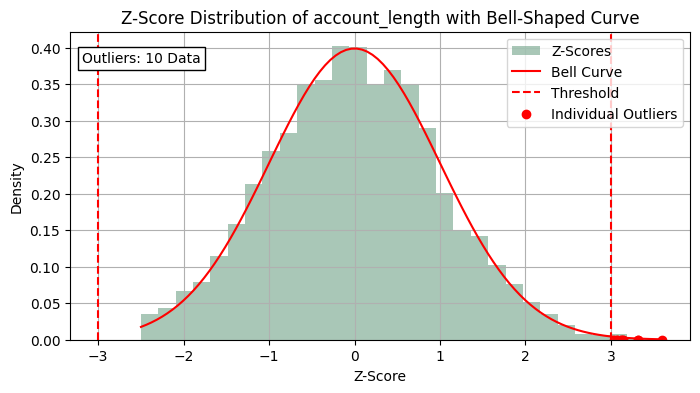

In [19]:
# z-score distribution of account_length feature.
zscore_visualization(df_copy,"account_length", df_copy['zscore'], account_length_outliers['zscore'])

#### ✅ number_vmail_messages

In [20]:
# FORMULA: Z-score = (observed value - population mean)/standard deviation.
df_copy["zscore"] = (df_copy["number_vmail_messages"] - df_copy["number_vmail_messages"].mean())/ df_copy["number_vmail_messages"].std()
df_copy.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,1.366696
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,-0.567845
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,-0.567845
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,-0.567845
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,1.217885


In [21]:
# Retrieve data with a z-score value that is less than -3 or greater than 3.
number_vmail_messages_outliers = df_copy[(df_copy.zscore<-3) | (df_copy.zscore>3)]
number_vmail_messages_outliers

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,zscore
229,SD,144,area_code_408,no,yes,48,189.8,96,32.27,123.4,...,10.49,214.2,106,9.64,6.5,2,1.76,2,yes,3.003615
1346,AR,63,area_code_510,no,yes,49,214.9,86,36.53,198.2,...,16.85,170.8,139,7.69,8.2,5,2.21,0,no,3.078021
2303,WV,137,area_code_510,no,yes,50,186.5,94,31.71,178.0,...,15.13,215.6,100,9.70,12.1,4,3.27,2,no,3.152426
2443,OR,134,area_code_415,no,yes,50,208.8,130,35.50,132.9,...,11.30,136.7,107,6.15,11.1,4,3.00,2,no,3.152426
2979,VA,71,area_code_415,no,yes,49,174.0,122,29.58,168.6,...,14.33,132.1,120,5.94,7.8,4,2.11,1,no,3.078021
3022,FL,133,area_code_408,no,yes,49,229.4,78,39.00,219.5,...,18.66,172.3,115,7.75,12.0,4,3.24,3,no,3.078021
3828,NV,87,area_code_408,no,yes,48,178.8,91,30.40,246.8,...,20.98,262.4,119,11.81,9.0,8,2.43,1,no,3.003615
4000,ME,108,area_code_510,no,yes,48,185.6,125,31.55,224.6,...,19.09,284.7,87,12.81,6.9,3,1.86,1,no,3.003615
4005,UT,118,area_code_408,yes,yes,52,123.7,114,21.03,133.2,...,11.32,191.8,102,8.63,7.9,3,2.13,0,no,3.301237
4061,NY,102,area_code_408,no,yes,48,134.0,83,22.78,234.3,...,19.92,197.3,107,8.88,7.8,4,2.11,6,yes,3.003615


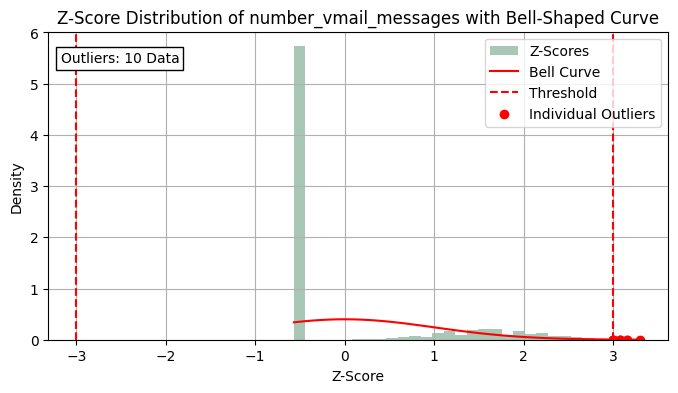

In [22]:
# z-score distribution of number_vmail_messages column.
zscore_visualization(df_copy,"number_vmail_messages", df_copy['zscore'], number_vmail_messages_outliers['zscore'])

### ⚠ **NOTES ON HANDLING DATA OUTLIER** ⚠

> #### ***In this case, the outlier data is retained***

When dealing with outliers, the first step is to check if they are contaminated data. Check the accuracy of the data and calculations. If the outliers are indeed contaminated, exclude them from the study. If possible, replace the contaminated data with the correct values. Outliers may sometimes represent valid and uncontaminated data, but they have extreme values compared to the majority of the data points in the group. There are two approaches to handling outliers: eliminate them or preserve them.  The decision to retain or discard the outliers depends on the specific context and goals of the study.

### ⚡ Featur encoding
Change the **categorical data** to **numerical data**

The feature encoding method used:
1.   state: **Frequency Encoding**
2.   area_code: **One-hot Encoding**
3.   international_plan: **Label Encoding**
4.   voice_mail_plan: **Label Encoding**

#### ✅ Encode stat column using **Frequency encoding**



##### Frequency encoding process of stat column in the **training data**

In [23]:
frq_dis = df_train.groupby('state').size()/len(df_train)
frq_dis.head()

state
AK    0.014353
AL    0.023765
AR    0.016706
AZ    0.018118
CA    0.009176
dtype: float64

In [24]:
df_train["state"] = df_train.state.map(frq_dis)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.022353,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.022588,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0.022353,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.018353,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.020941,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


##### Frequency encoding process of stat column in the **testing data**

In [25]:
frq_dis = df_test.groupby('state').size()/len(df_test)
frq_dis.head()

state
AK    0.014667
AL    0.030667
AR    0.028000
AZ    0.016000
CA    0.017333
dtype: float64

In [26]:
df_test["state"] = df_test.state.map(frq_dis)
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0.016000,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,0.030667,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,0.009333,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,0.020000,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,0.020000,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


#### ✅ Encode area_code column using **One-hot encoding**

In [27]:
# Call the One-hot encoding module
enc_one = OneHotEncoder()

##### One-hot encoding for area_code column in the **training data**

In [28]:
x = df_train["area_code"].values.reshape(-1,1)
val_train = enc_one.fit_transform(x).toarray()

In [29]:
# Lets assign the column name to each one hot vector
df_onehot_train = pd.DataFrame(val_train,columns=['is_'+str(enc_one.categories_[0][i]) for i in range(len(enc_one.categories_[0]))])
df_onehot_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [30]:
df_c = df_train.copy()

In [31]:
df_enc_train = pd.concat([df_onehot_train, df_c],axis=1)
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,area_code_415,no,yes,26,161.6,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,area_code_415,no,no,0,243.4,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,area_code_408,yes,no,0,299.4,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,area_code_415,yes,no,0,166.7,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,area_code_510,no,yes,24,218.2,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [32]:
#droping the area_code column
df_enc_train.drop("area_code",inplace=True,axis=1)
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,no,yes,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


##### One-hot encoding for area_code column in the **testing data**

In [33]:
x = df_test["area_code"].values.reshape(-1,1)
val_test = enc_one.fit_transform(x).toarray()

In [34]:
# Lets assign the column name to each one hot vector
df_onehot_test = pd.DataFrame(val_test,columns=['is_'+str(enc_one.categories_[0][i]) for i in range(len(enc_one.categories_[0]))])
df_onehot_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [35]:
df_c = df_test.copy()

In [36]:
df_enc_test = pd.concat([df_onehot_test, df_c],axis=1)
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,1,0.016000,128,area_code_415,no,yes,25,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,2,0.030667,118,area_code_510,yes,no,0,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,3,0.009333,62,area_code_415,no,no,0,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,4,0.020000,93,area_code_510,no,no,0,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,5,0.020000,174,area_code_415,no,no,0,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [37]:
#droping the area_code column
df_enc_test.drop(["area_code","id"],inplace=True,axis=1)
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,128,no,yes,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,0.030667,118,yes,no,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,0.009333,62,no,no,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,0.020000,93,no,no,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,0.020000,174,no,no,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


#### ✅ Encode international_plan column using **Lable encoding**

In [38]:
international_plan = {"no" : 0, "yes" : 1}
df_enc_train['international_plan'] = df_enc_train['international_plan'].map(international_plan)
df_enc_test['international_plan'] = df_enc_test['international_plan'].map(international_plan)

In [39]:
df_enc_train['international_plan'].value_counts()

international_plan
0    3854
1     396
Name: count, dtype: int64

In [40]:
df_enc_test['international_plan'].value_counts()

international_plan
0    673
1     77
Name: count, dtype: int64

#### ✅ Encode voice_mail_plan column using **Lable encoding**

In [41]:
voice_mail_plan = {"no" : 0, "yes" : 1}
df_enc_train['voice_mail_plan'] = df_enc_train['voice_mail_plan'].map(voice_mail_plan)
df_enc_test['voice_mail_plan'] = df_enc_test['voice_mail_plan'].map(voice_mail_plan)

In [42]:
df_enc_train['voice_mail_plan'].value_counts()

voice_mail_plan
0    3138
1    1112
Name: count, dtype: int64

In [43]:
df_enc_test['voice_mail_plan'].value_counts()

voice_mail_plan
0    539
1    211
Name: count, dtype: int64

In [44]:
df_enc_train.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,107,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0.0,1.0,0.0,0.022588,137,0,0,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,1.0,0.0,0.0,0.022353,84,1,0,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0.0,1.0,0.0,0.018353,75,1,0,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0.0,0.0,1.0,0.020941,121,0,1,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [45]:
df_enc_test.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,128,0,1,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0.0,0.0,1.0,0.030667,118,1,0,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0.0,1.0,0.0,0.009333,62,0,0,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0.0,0.0,1.0,0.020000,93,0,0,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0.0,1.0,0.0,0.020000,174,0,0,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


### ⚡ Normalisation using MinMax Normalisation

In [46]:
# The minimum value in each feature
numeric_min = df_train[numerical].min().to_dict()
numeric_min

{'account_length': 1.0,
 'number_vmail_messages': 0.0,
 'total_day_minutes': 0.0,
 'total_day_calls': 0.0,
 'total_day_charge': 0.0,
 'total_eve_minutes': 0.0,
 'total_eve_calls': 0.0,
 'total_eve_charge': 0.0,
 'total_night_minutes': 0.0,
 'total_night_calls': 0.0,
 'total_night_charge': 0.0,
 'total_intl_minutes': 0.0,
 'total_intl_calls': 0.0,
 'total_intl_charge': 0.0,
 'number_customer_service_calls': 0.0}

In [47]:
# The maximum value in each feature
numeric_max = df_train[numerical].max().to_dict()
numeric_max

{'account_length': 243.0,
 'number_vmail_messages': 52.0,
 'total_day_minutes': 351.5,
 'total_day_calls': 165.0,
 'total_day_charge': 59.76,
 'total_eve_minutes': 359.3,
 'total_eve_calls': 170.0,
 'total_eve_charge': 30.54,
 'total_night_minutes': 395.0,
 'total_night_calls': 175.0,
 'total_night_charge': 17.77,
 'total_intl_minutes': 20.0,
 'total_intl_calls': 20.0,
 'total_intl_charge': 5.4,
 'number_customer_service_calls': 9.0}


> 📌 **MinMax Normalisation Formula**

$$
x′ = \frac{𝑥𝑖 - 𝑚𝑖𝑛(𝑥)}{𝑚𝑎𝑥(𝑥) − 𝑚𝑖𝑛(𝑥)}
$$

**Notes:**
1.   x′ = Result of normalization
2.   𝑥𝑖 = Specific value
3.   𝑚𝑖𝑛(𝑥) = Minimum value of the attribute
4.   𝑚𝑎𝑥(𝑥) = Maximum value of the attribute

In [48]:
# Function of data normalisation
def normalize(df, decimal_places=2):
    for key in numeric_min.keys():
        df[key] = round((df[key] - numeric_min[key])/ (numeric_max[key]-numeric_min[key]),decimal_places)
    return df

In [49]:
df_train_norml = normalize(df_enc_train, decimal_places=3)
df_train_norml.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,1.0,0.0,0.022353,0.438,0,1,0.500,0.460,0.745,...,0.606,0.544,0.644,0.589,0.644,0.685,0.15,0.685,0.111,no
1,0.0,1.0,0.0,0.022588,0.562,0,0,0.000,0.692,0.691,...,0.647,0.337,0.412,0.594,0.412,0.610,0.25,0.609,0.000,no
2,1.0,0.0,0.0,0.022353,0.343,1,0,0.000,0.852,0.430,...,0.518,0.172,0.498,0.509,0.499,0.330,0.35,0.330,0.222,no
3,0.0,1.0,0.0,0.018353,0.306,1,0,0.000,0.474,0.685,...,0.718,0.413,0.473,0.691,0.473,0.505,0.15,0.506,0.333,no
4,0.0,0.0,1.0,0.020941,0.496,0,1,0.462,0.621,0.533,...,0.635,0.970,0.538,0.674,0.539,0.375,0.35,0.376,0.333,no


In [50]:
df_test_norml = normalize(df_enc_test, decimal_places=3)
df_test_norml.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.016000,0.525,0,1,0.481,0.754,0.667,...,0.549,0.582,0.549,0.619,0.520,0.620,0.500,0.15,0.500,0.111
1,0.0,0.0,1.0,0.030667,0.483,1,0,0.000,0.636,0.594,...,0.614,0.594,0.614,0.516,0.674,0.517,0.315,0.30,0.315,0.000
2,0.0,1.0,0.0,0.009333,0.252,0,0,0.000,0.343,0.424,...,0.855,0.447,0.855,0.514,0.566,0.514,0.655,0.30,0.656,0.444
3,0.0,0.0,1.0,0.020000,0.380,0,0,0.000,0.543,0.691,...,0.607,0.653,0.607,0.328,0.691,0.328,0.405,0.15,0.406,0.333
4,0.0,1.0,0.0,0.020000,0.715,0,0,0.000,0.354,0.461,...,0.771,0.659,0.771,0.635,0.657,0.635,0.775,0.25,0.776,0.333


---
⏭ Next step

---

# 4. Modelling

In [51]:
# independent and dependent variables separation
data_train_churn = df_train_norml.drop('churn',axis = 1 )
target = df_train_norml['churn']

In [52]:
# Show training data without dependent attribute (class data)
data_train_churn.head()

,is_area_code_408,is_area_code_415,is_area_code_510,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.0,1.0,0.0,0.022353,0.438,0,1,0.500,0.460,0.745,...,0.544,0.606,0.544,0.644,0.589,0.644,0.685,0.15,0.685,0.111
1,0.0,1.0,0.0,0.022588,0.562,0,0,0.000,0.692,0.691,...,0.337,0.647,0.337,0.412,0.594,0.412,0.610,0.25,0.609,0.000
2,1.0,0.0,0.0,0.022353,0.343,1,0,0.000,0.852,0.430,...,0.172,0.518,0.172,0.498,0.509,0.499,0.330,0.35,0.330,0.222
3,0.0,1.0,0.0,0.018353,0.306,1,0,0.000,0.474,0.685,...,0.413,0.718,0.413,0.473,0.691,0.473,0.505,0.15,0.506,0.333
4,0.0,0.0,1.0,0.020941,0.496,0,1,0.462,0.621,0.533,...,0.970,0.635,0.970,0.538,0.674,0.539,0.375,0.35,0.376,0.333


In [53]:
# Show dependent attribute (class data) of training data
target.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

##### 🔬 **Naive Bayes** model performance with **10 Fold Cross Validation**

In [54]:
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, data_train_churn, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
mean_score_nb = score.mean()
print(f"The mean score of cross validation using Naive Bayes (NB) algorithm is {mean_score_nb * 100:.2f}%")

[0.91764706 0.86588235 0.87058824 0.86823529 0.86588235 0.85411765
 0.90352941 0.87058824 0.82823529 0.88470588]
The mean score of cross validation using Naive Bayes (NB) algorithm is 87.29%


##### 🔬 **Decision Tree** model performance with **10 Fold Cross Validation**

In [55]:
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, data_train_churn, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
mean_score_dt = score.mean()
print(f"The mean score of cross validation using Decision tree (DT) algorithm is {mean_score_dt * 100:.2f}%")

[0.91764706 0.91529412 0.93882353 0.92470588 0.92705882 0.91294118
 0.94117647 0.91058824 0.90117647 0.92941176]
The mean score of cross validation using Decision tree (DT) algorithm is 92.19%


##### 🔬 **K-Nearest Neighbor** model performance with **10 Fold Cross Validation**

In [56]:
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, data_train_churn, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
mean_score_knn = score.mean()
print(f"The mean score of cross validation using K-Nearest Neighbor algorithm (KNN) is {mean_score_knn * 100:.2f}%")

[0.91294118 0.88705882 0.90588235 0.88235294 0.87529412 0.89647059
 0.91764706 0.89411765 0.88       0.90823529]
The mean score of cross validation using K-Nearest Neighbor algorithm (KNN) is 89.60%


##### 🔬 **Support Vector Machine** model performance with **10 Fold Cross Validation**

In [57]:
k_fold = KFold(n_splits=10 , shuffle=True, random_state=0)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, data_train_churn, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
mean_score_svm = score.mean()
print(f"The mean score of cross validation using Support Vector Machine (SVM) algorithm is {mean_score_svm * 100:.2f}%")

[0.90588235 0.88705882 0.89882353 0.88705882 0.88       0.89647059
 0.89882353 0.88       0.88       0.92235294]
The mean score of cross validation using Support Vector Machine (SVM) algorithm is 89.36%


In [58]:
# Add the mean score to an array.
result_modelling = [{mean_score_nb*100},{mean_score_dt*100},{mean_score_knn*100},{mean_score_svm*100}]
# Add the model name to an array.
model = ["NB","DT","KNN","SVM"]

# Convert result_modeling and model into a DataFrame using Pandas.
result_modelling = pd.DataFrame(result_modelling,columns=["Results"])
model = pd.DataFrame(model,columns=["Model"])

In [59]:
# Merge the model table with the result_modeling table.
modelling = pd.concat([model,result_modelling],axis=1)
modelling

,Model,Results
0,NB,87.294118
1,DT,92.188235
2,KNN,89.600000
3,SVM,89.364706


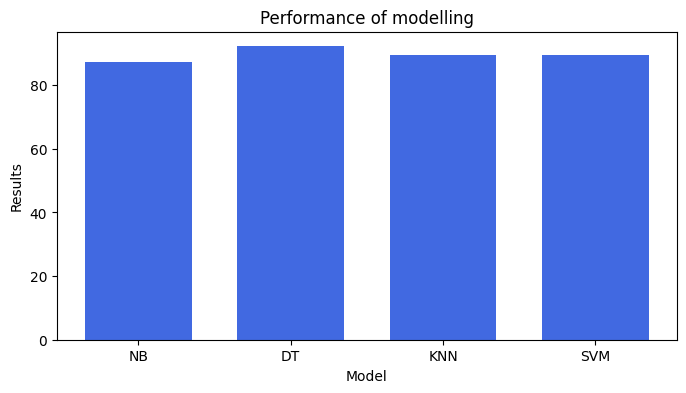

In [60]:
# Visualize model performance in a bar chart.
model = modelling.Model
results = modelling.Results
fig = plt.figure(figsize = (8,  4))
plt.bar(model, results, color = "royalblue", width = 0.7)
plt.xlabel('Model')
plt.ylabel('Results')
plt.title('Performance of modelling')
plt.show()

☕ The **Decision Tree Classifier** demonstrates **higher accuracy** than Naive Bayes, K-Nearest Neighbor, and Support Vector Machine based on cross-validation results with k=10. The obtained accuracy is **92.56%**.

---
⏭ Next step

---

# 5. Prediction

In [61]:
# Create a model object.
clf = DecisionTreeClassifier()
# Train the model.
clf.fit(data_train_churn, target)

DecisionTreeClassifier()

In [62]:
# Evaluate the model on the testing data.
data_test_churn = df_test_norml
prediction = clf.predict(data_test_churn)

In [63]:
# Merge the test data ID with the prediction result.
data_test = pd.read_csv(r"D:\customer_churn_prediction_system\test.csv")
submission = pd.DataFrame({
        "id": data_test["id"],
        "churn": prediction
    })
submission.head()

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no


In [64]:
# Create a churn feature for the test data and add the prediction result.
data_test["churn"] = submission["churn"]
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,yes
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no


In [65]:
# Save the final result of the test data prediction in CSV format.
data_test.to_csv(r"D:\customer_churn_prediction_system\test.csv")

# 6. **Discussion**

☕ This work **is not perfect**. There are still many parts that can be improved to enhance both data quality and prediction model quality.

Suggestions:

1.   Implement **feature selection** to obtain **relevant features** that **significantly contribute** to model performance.
2.   Experiment with **different data preprocessing methods** to further improve data quality.
3.   Pay attention to the **unbalanced distribution** of data classes.
4.   Perform **hyperparameter tuning** on the algorithm to obtain the best parameters for the model.

